#  <font size="+4" color='#053c96'><b> Proyecto: Tarjetas de crédito y migración de clientes</b></font>


# Contexto
#### El gerente de un banco observa que múltiples clientes están dejando de usar las tarjetas de crédito y migrando hacia otros productos de la competencia. Por este motivo, le pide al área de data science investigar esta rara situación y predecir si otros clientes tambien estaría dejando el servicio de tarjetas de crédito. Se te brinda la base de datos de los clientes y en base a ello se debe generar insights que ayuden a solucionar este problema.

# Introducción
#### El siguiente proyecto busca predecir la migración de clientes usando la base de datos y modelos de machuine learning. Los modelos a usar son LogisticRegression, RandomForest


## Empezamos cargando las librerias iniciales y la base de datos


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import os
perlita

In [2]:
pd.set_option('max_rows',99999)

In [3]:
os.chdir('C:/Users/User/Desktop/CreditCardProject')

# 1. Conociendo la base de datos

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
#Forma del dataset
print('Núemero de filas: {}'.format(df.shape[0]))
print('Núemero de columnas: {}'.format(df.shape[1]))

Núemero de filas: 10127
Núemero de columnas: 22


In [7]:
# Las variables contenidas en el dataset
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
#print('Número de variables categóricas: {}'.format(len(list(df.select_dtypes(include= 'object').columns))))
print(list(df.select_dtypes(include= 'object').columns)
)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [9]:
print('Número de variables numéricas: {}'.format(len(list(df.select_dtypes(exclude= 'object').columns))))
print(list(df.select_dtypes(exclude = 'object').columns))



Número de variables numéricas: 16
['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [10]:
list(df.select_dtypes(exclude = 'object').columns)

['Unnamed: 0',
 'CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

# Introducción a las variables


**Variables categóricas**
- **'Attrition_Flag'**:variable que muestra si el cliente cancela la cuenta de la tarjeta(1 si cancela si no 0)
- **'Gender'**: variable de género del cliente
- **'Education_Level'**: Nivel educativo del cliente
- **'Marital_Status'**: Estado civil del cliente
- **'Income_Category'**: ingreso anual del cliente por rangos 
- **'Card_Category'**: tipo de tarjeta dependiendo el saldo de la misma 
***
**Variables numéricas**
- **'Unnamed: 0'**: variable index de defecto del dataset
- **'CLIENTNUM'**: número único del cliente(Identificador)
- **'Customer_Age'**: edad del cliente 
- **'Dependent_count'**: número de dependientes al cliente
- **'Months_on_book'**: periodo de relación con el banco
- **'Total_Relationship_Count'**: número de productos ligados al cliente
- **'Months_Inactive_12_mon'**: meses de inactividad del cliente
- **'Contacts_Count_12_mon'**: cantidad de contactos en los últimos 12 meses
- **'Credit_Limit'**: límite crediticio
- **'Total_Revolving_Bal'**: monto de interes créditicios totales
- **'Avg_Open_To_Buy'**: créditos posibles a pedir(promedio de los últimos 12 meses)
- **'Total_Amt_Chng_Q4_Q1'**:cambios es los montos del Q4 Q1
- **'Total_Trans_Amt'**:cantidad transada en los últimos 12 meses
- **'Total_Trans_Ct'**:cantidad de transacciones en los últimos  meses
- **'Total_Ct_Chng_Q4_Q1'**: cambios en las transacciones del Q4 a Q1
- **'Avg_Utilization_Ratio'**: radio de uso promedio

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
Unnamed: 0                  10127 non-null int64
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float

In [12]:
# Buscamos missings values
df.isna().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- El dataset no presenta missings values, por lo cual no hará falta técnicas de imputas. Sin embargo, aún no se evalúa la distribución de las variables y posiles outliers o técnicas de scaling.

In [13]:
#describe de las variables categoricas
df.describe(include ='object' )

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [14]:
# describe de las variables numéricas
df.select_dtypes(include = ['int64','float64']).describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [15]:
#Eliminamos la variable unnamed que es el index del dataset
df= df.drop(['Unnamed: 0'],1)

In [16]:
categorical = list(df.select_dtypes(include='object').columns)
numerical = list(df.select_dtypes(exclude = 'object').columns)

## 2. Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

La variable target es **Attrition_Flag**, por lo cual veremos la distribución de las distintas variables y en específico la diferencia al ocurrir la migración de lo clientes. Todo esto con el fin de indentificar patrones de comportamiento en las variables y ver alguna correlación inversa o directa.

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


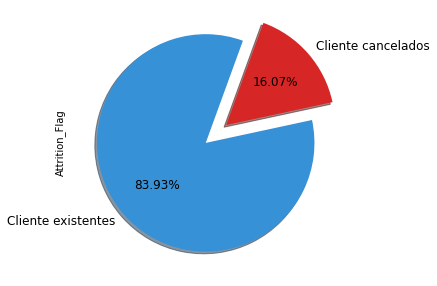

In [18]:
plt.figure(figsize=(10,5))
df["Attrition_Flag"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors= ["#3791D7", "#D72626"]
, labels=['Cliente existentes','Cliente cancelados'], fontsize=12, startangle=70)
print(df["Attrition_Flag"].value_counts())

Como podemos observar, solo el **16.07%** es de clientes que han cancelado la tarjeta de crédito. Esto podría significar un problema ya que se trata de una **muestra desbalanceada**, lo cual dificularía el entrenamiento de los modelos estadísticos.

## Variables categóricas

Ploteamos las variables categóricas distinguiendolas sobre la variable targer(Attrition_Flag) para poder obtener algunas conclusiones observando la distribución de los datos

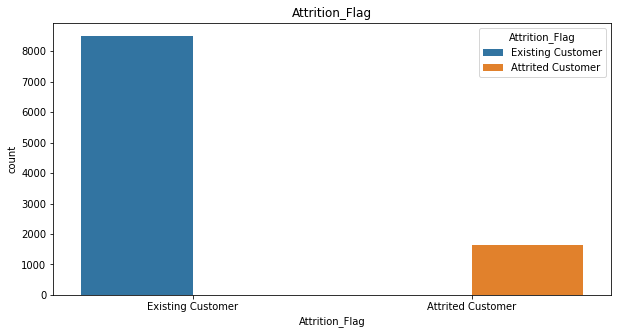

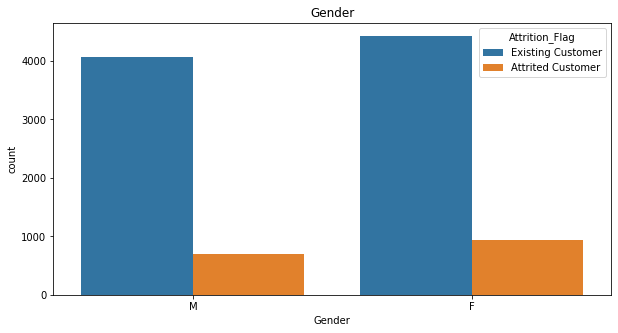

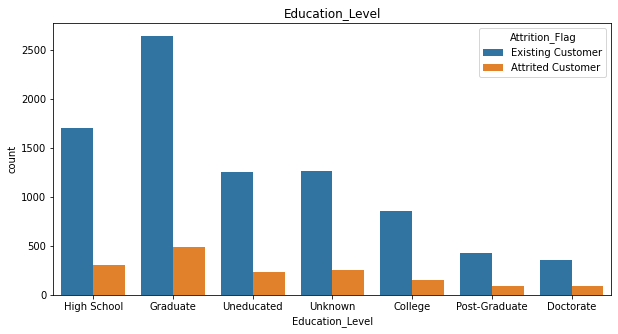

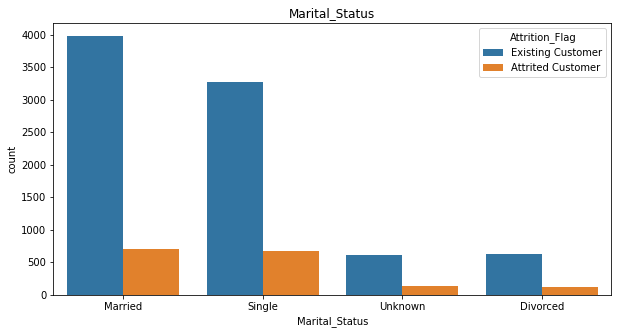

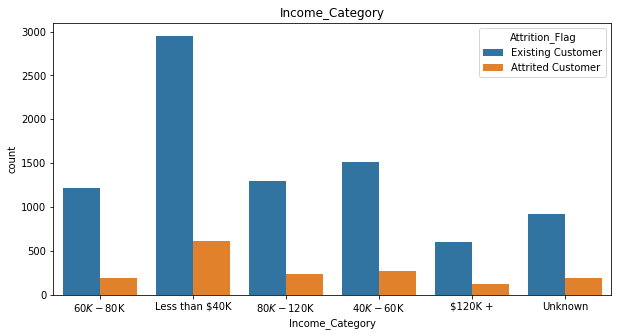

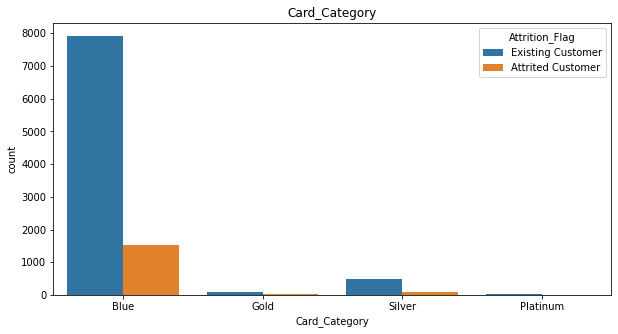

In [19]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    plt.title(i)
    sns.countplot(df[i], hue = df.Attrition_Flag,dodge=True)


**Conclusiones de las variables categóricas**
- **Gender:** Existe mayor presencia de **mujeres** en la muestra. Asimismo, las mujeres son las que, por una vaga diferencia, cancelan su tarjeta de crédito.
- **Education** level:el nivel de educación que predomina en la muestra es de **'Graduate'** y la que menos predomina es 'Doctorate'. Asimismo, es en el nivel educativo Graduate donde se da la mayor proporcion de cancelación de tarjetas de crédito. Esto se puede deber al poco ingreso que puedan percibir .
- **Marital Status**: La mayoría de individuos en la muestra son **casados**(Married) y la menor proporción son **divorciados**. Asimismo, los clientes con tarjetas canceladas se encuentras en el grupo **casados y siguiendo la proporción, el grupo de divorciados son los que menos cancelan su tarjeta. 
- **Income category**: el grupo predominante es **'Less than 40K'** y el menos predominante es **'120K +'**. Asimismo, el grupo que más cancela su tarjeta es el indicado como predominante y el que menos proporción de tarjetas cancelada presenta es el menos predominante. Esto talves se pueda ligar a la capacidad económica . Además, estaría ligado de cierta manera a la **educación**.
- **Card category**: la tarjeta más común en la muestra es **'Blue'** y la menos común es **'Platinium'**. Siguiendo esto, la categoría con más tarjetas canceladas es la 'Blue'. De nuevo, esto se puede deber al ingreso y a la educación que tenga el cliente.
***


## Variablés numéricas

Analizamos gráficamente la distribución de las variables númericas para extraer algun patrón o comportamiento a partir de los gráficos.

In [20]:
df.select_dtypes(include = ('int64','float64')).columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:
import matplotlib.gridspec as gridspec # to do the grid of plots


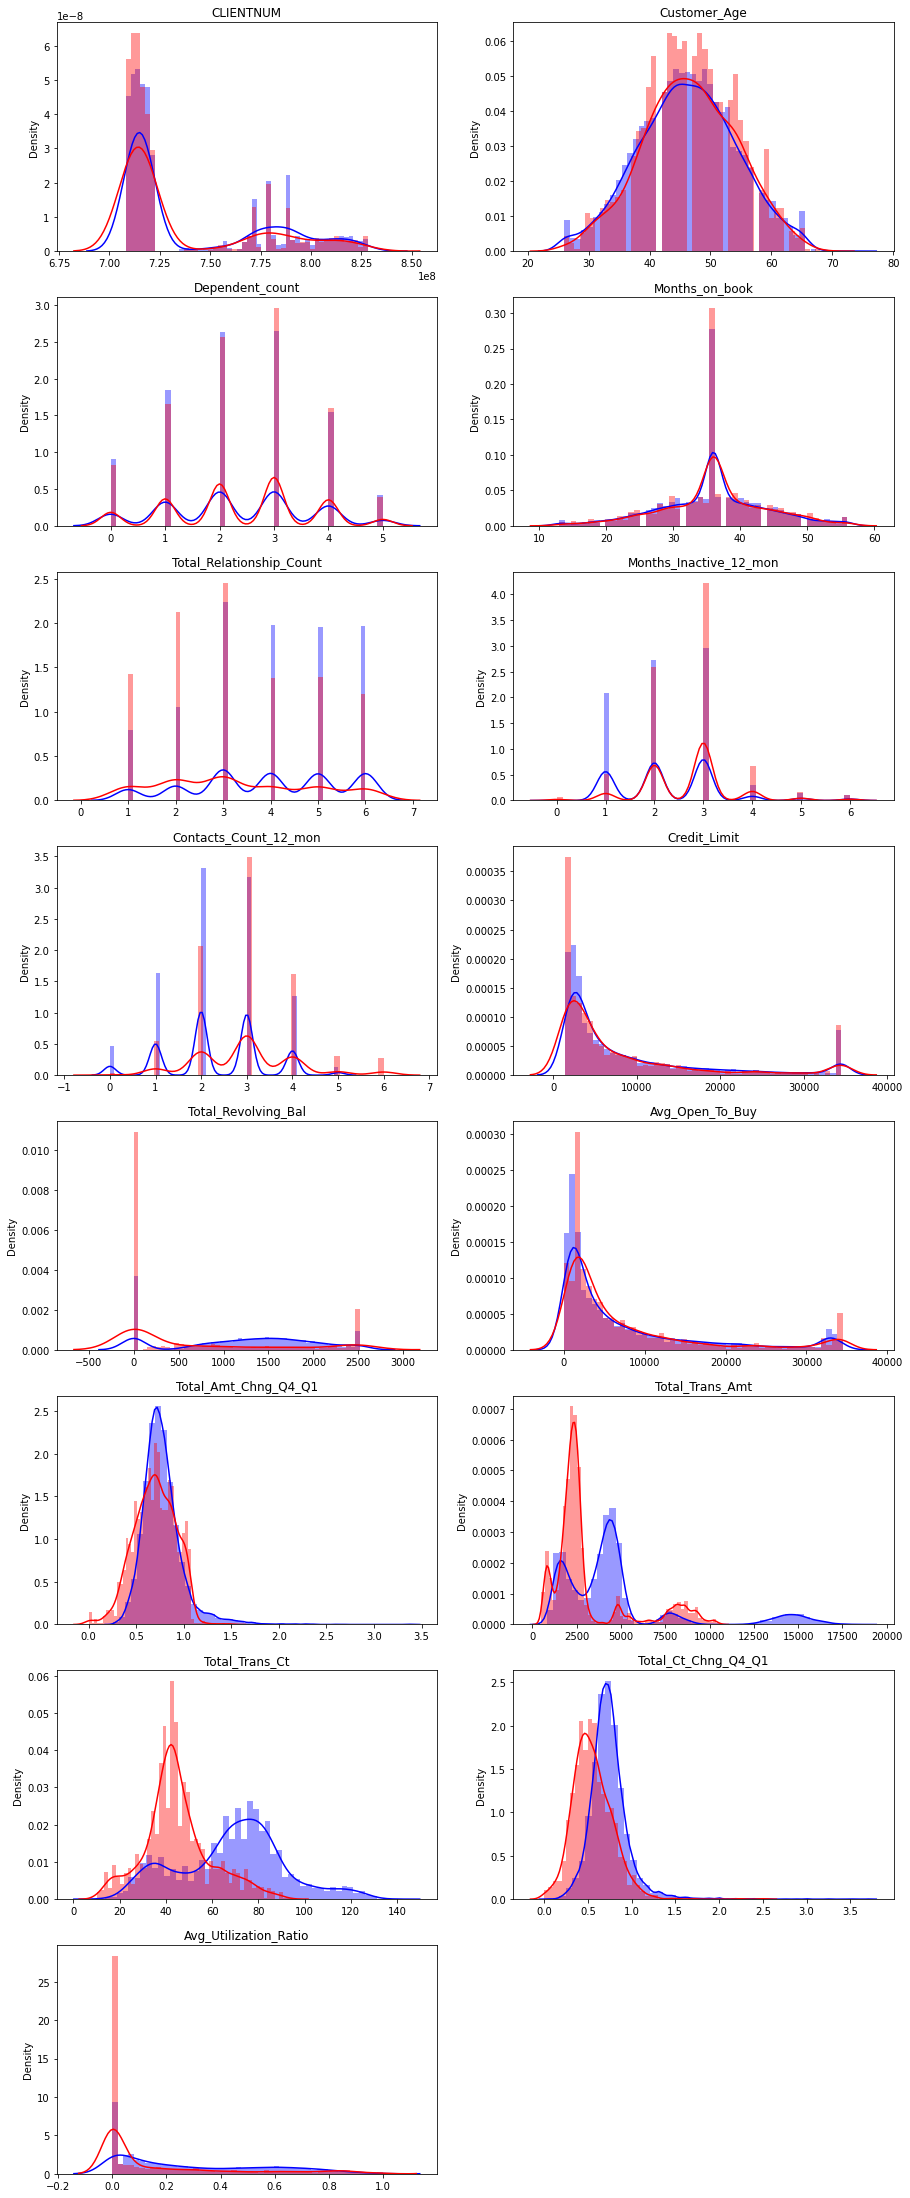

In [22]:
columns = df.select_dtypes(include = ['int64','float64']).columns


grid = gridspec.GridSpec(16, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][df.Attrition_Flag == 'Existing Customer'], bins = 50, color='b') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][df.Attrition_Flag == 'Attrited Customer'], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

    

**Conclusiones**
- **Edad**:No es visible una diferencia clara en cuanto a la variable edad. La cancelación de la tarjeta tiene presencia a lo largo del gráfico con picos en el rango de 40 a 50 años.
- **Avg_Utilization_Ratio**:Se puede observar que en el valor del ratio de uso igual a **0** la mayoría de individuos de la muestra pertenecen al grupo que canceló su tarjeta. Esto da a entender que las personas cancelaron su tarjeta por el poco o nulo uso que le daban y no talvez por la incapacidad de pagarla.
- **Total_Trans_Ct**: se puede ver una disferencia clara en la distribución de del total de transacciones. Teniendo como menor numero los clientes que abandonan el servicio y como mayor los clientes existentes.
- **Total_Trans_Amt**: Esta variable presenta una distriución camiante al ser separada por la variable target, puede servir como variable crítica para entrenar el modelo. 
- Las demás variables no presentan distriuciones anómalas o con rasgos marcados que se deban explicar o que genere controversia
***

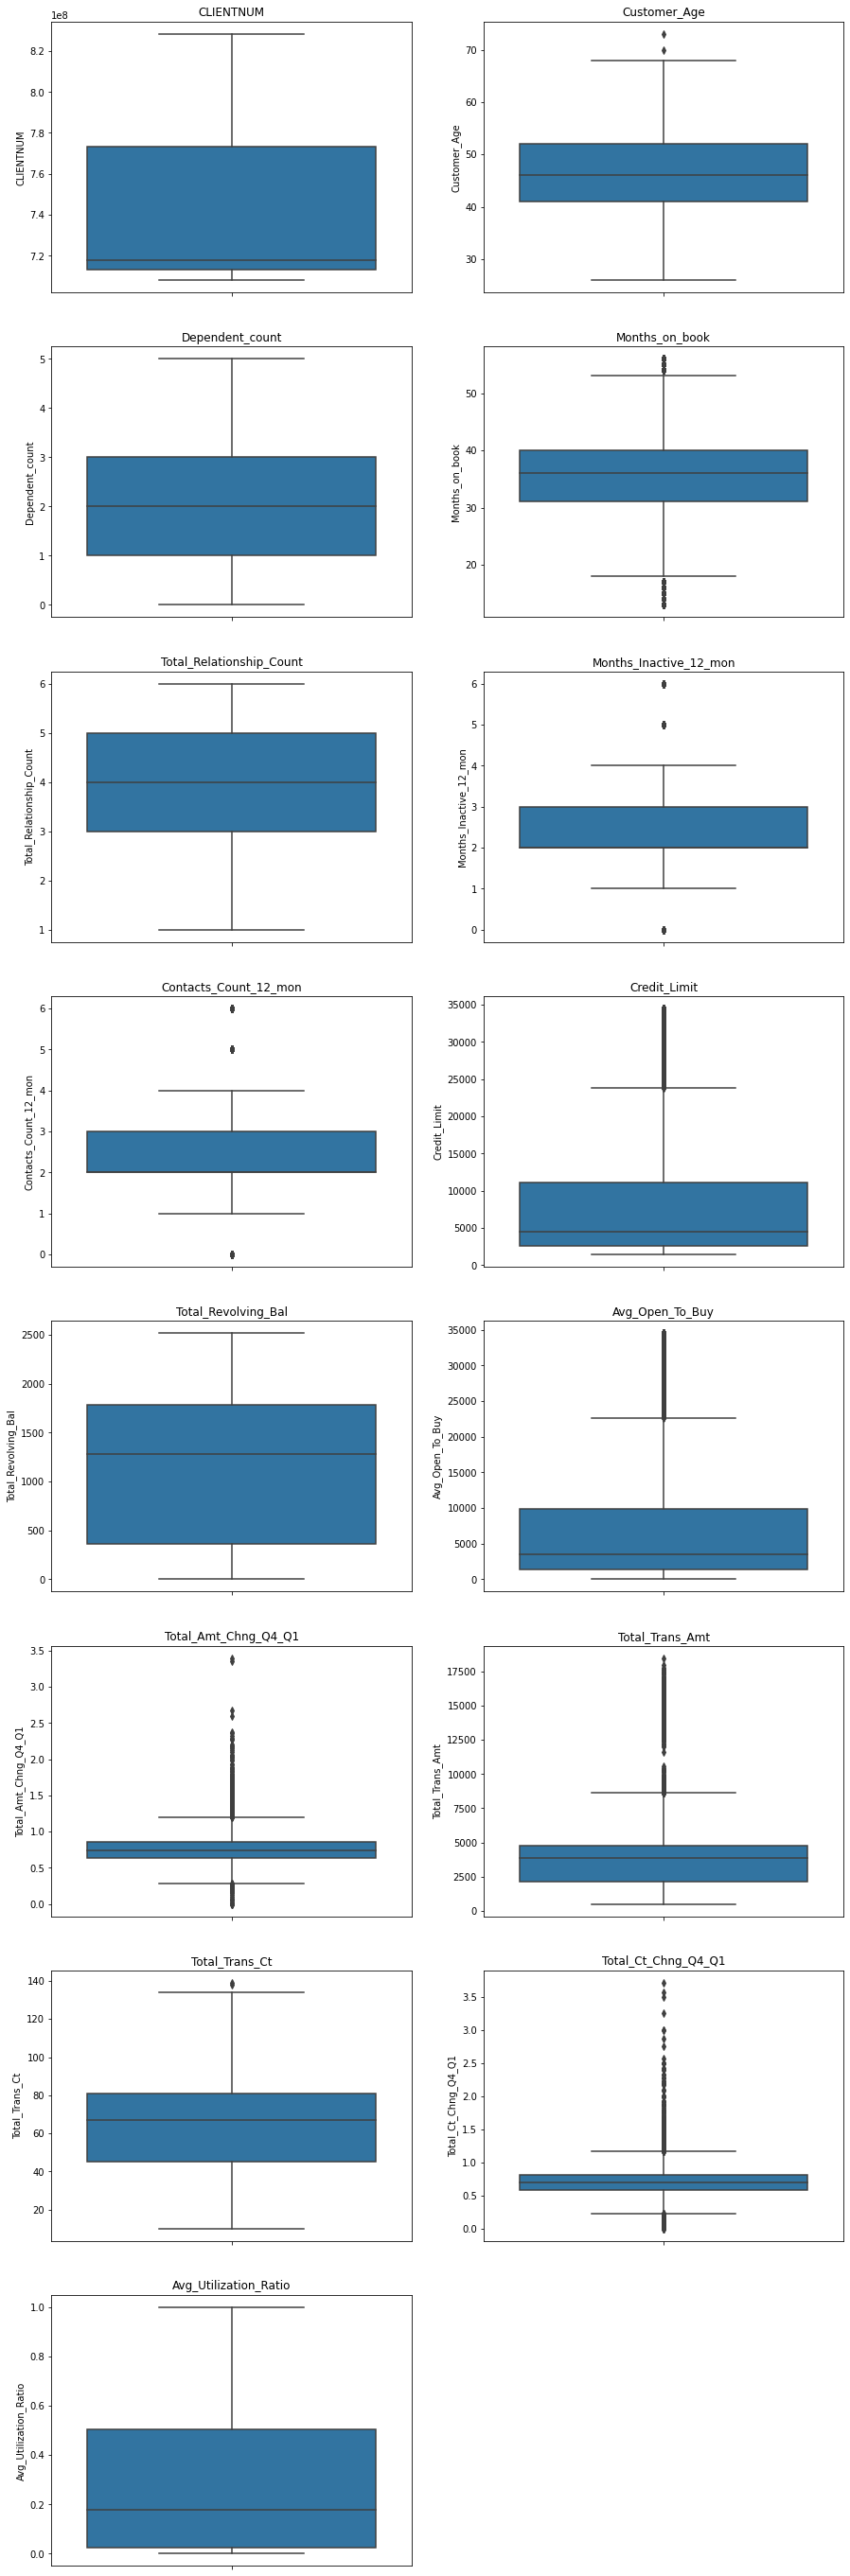

In [23]:
columns = df.select_dtypes(include = ['int64','float64']).columns


grid = gridspec.GridSpec(16, 2)
plt.figure(figsize=(15,20*5))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.boxplot(df[col],orient = 'v') #Will receive the "semi-salmon" violin
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()


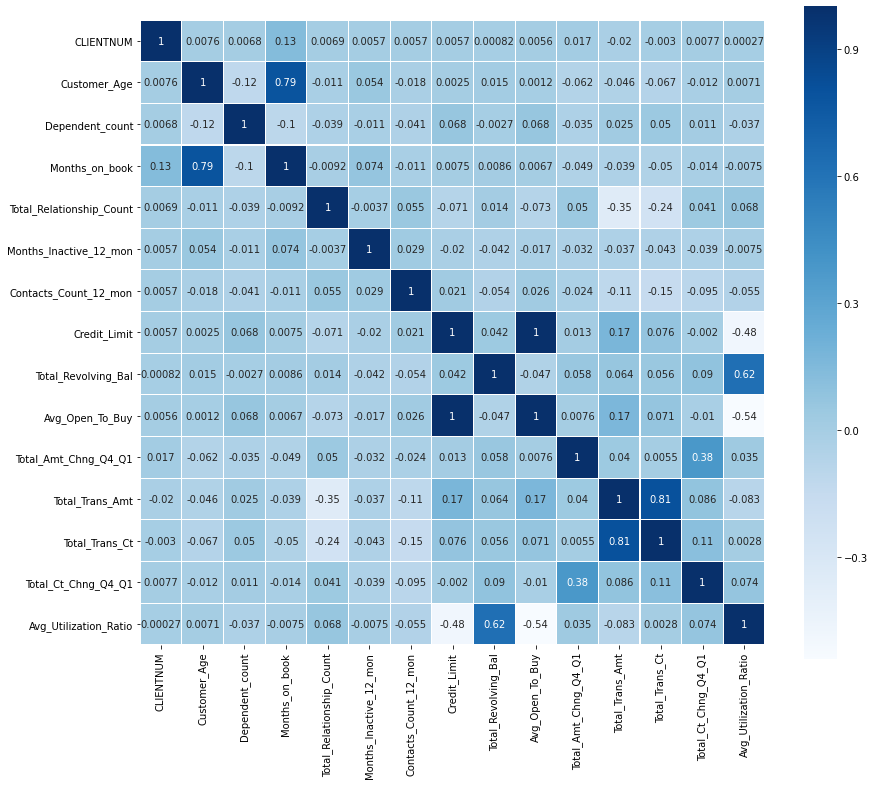

In [24]:
colormap = plt.cm.Blues

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True
           )
plt.show()


# 3. Data preprocessing

### Tratamiento de variables categóricas 

In [25]:
# Mostramos los valores únicos de las variables categóricas para evaluar la estrategia de etiquetado
print("Attrition_Flag :",df["Attrition_Flag"].unique())
print("Gender         :",df["Gender"].unique())
print("Education_Level:",df["Education_Level"].unique())
print("Marital_Status :",df["Marital_Status"].unique())
print("Income_Category:",df["Income_Category"].unique())
print("Card_Category  :",df["Card_Category"].unique())


Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender         : ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category  : ['Blue' 'Gold' 'Silver' 'Platinum']


In [26]:
#Target variable
df['Attrition_Flag'] = df['Attrition_Flag'].replace('Existing Customer', 0)
df['Attrition_Flag'] = df['Attrition_Flag'].replace('Attrited Customer', 1)

In [27]:
df.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [28]:
#variable género
df.Gender= df.Gender.replace('F',0)
df.Gender = df.Gender.replace('M',1)
df.Gender.value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [29]:
# Dummies
df_dumi= pd.get_dummies(df, drop_first=True)
#Eliminamos una columna de cada dummie para ecitar caer en la trampa de las variables dummies.

In [30]:
df_dumi.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [31]:
df_dumi = df_dumi.drop(['CLIENTNUM'],1)

In [32]:
X = df_dumi.drop(['Attrition_Flag'],1)
y = df[['Attrition_Flag']]

 **Para el modelamiento usaremos la muestra de 3 maneras:**
- las variables numericas en su estado inicial
- las variables numéricas con estarización de valores
- las variables numéricas con narmalizacion de valores.  
 **Todo esto es con el fin de poder lograr mejores resultados debido al distinto nivel de precisión que tienen los algoritmos al tener valores atípicos.**
*** 


# 4. Modelamiento

Los modelos a usar:
- LoigisticRegression
- RandomForest
Asimismo se seguira la siguiente estructura:  
4.1 Predicciones con datos desbalanceados  
      4.1.1 Usando datos iniciales  
      4.1.2 Usando datos estandarizados  
      4.1.3 Usando datos normalizados  
 


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,make_scorer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Datos base

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25,stratify= y, random_state=2)

In [35]:
X_train.head(5)

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8917,44,0,3,36,1,3,2,9766.0,1575,8191.0,...,1,0,0,0,0,0,1,0,0,0
306,36,0,3,24,4,1,1,15439.0,0,15439.0,...,0,0,0,0,0,0,1,0,0,0
5461,47,0,2,40,4,3,3,1789.0,1088,701.0,...,1,0,0,0,0,1,0,0,0,0
2621,49,0,5,35,5,2,1,11115.0,1292,9823.0,...,0,0,1,0,0,0,0,0,0,0
5752,60,0,0,36,3,3,2,3068.0,0,3068.0,...,1,0,0,0,0,0,1,0,0,0


In [36]:
len(X_train),len(X_test)

(7595, 2532)

### Datos escalados
$ X' = \frac{X - Xmin}{Xmax-Xmin}$

In [37]:
norm = MinMaxScaler()
numerical = ['Customer_Age', 'Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
for i in numerical:
    X_train_norm[i] = norm.fit_transform(X_train_norm[[i]])
    X_test_norm[i] = norm.fit_transform(X_test_norm[[i]])
    

### Datos con distribubución normal
$ X' = \frac{x-\mu}{\sigma} $ 

In [38]:
scaler = StandardScaler()
numerical = ['Customer_Age', 'Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

for i in numerical:
    scale = scaler.fit(X_train_stand[[i]])
    X_train_stand[i] = scaler.transform(X_train_stand[[i]])
    X_test_stand[i] =scaler.fit_transform(X_test_stand[[i]])

## Logistic Regression 

In [73]:
Xtrain = [X_train, X_train_norm,X_train_stand]
Xtest = [X_test, X_test_norm,X_test_stand]



,Original,Normalized,Standardized
Accuracy,0.876777,0.903633,0.904028
Precission,0.697095,0.778157,0.744048
Recall,0.412776,0.560197,0.614251
F1_score,0.518519,0.651429,0.672948
AUC,0.892173,0.917254,0.921653


Logistic regression con datos estandarizados se comporta mejor. Este modelo se puede mejorar mediante los hiperparametros.

In [157]:
params= {'C': [0.001,0.1,1.0,10, 100],   'solver':['newton-cg','lbfgs','liblinear','sag','aga'],
            'penalty': ['none','l1','l2','elasticnet']}
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

grid = GridSearchCV(lm, params, cv = 10, scoring = scoring, refit = 'f1')

In [158]:
grid.fit(X_train_stand,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.001, 0.1, 1.0, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'aga']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [179]:
grid_pred = grid.predict(X_test_stand)

In [182]:
from sklearn.metrics import classification_report


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2125
           1       0.74      0.61      0.67       407

    accuracy                           0.90      2532
   macro avg       0.84      0.78      0.81      2532
weighted avg       0.90      0.90      0.90      2532



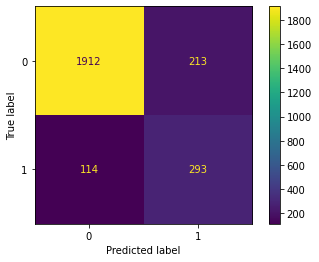

In [177]:
plot_confusion_matrix(lm, X_test_stand, y_test)

In [159]:
grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [186]:
lg_accuracy = []
lg_precission=[]
lg_recall = []
lg_f1=[]
lg_auc =[]
    # Initiate the model
lm = LogisticRegression(C=10, penalty = 'l2',solver = 'newton-cg', random_state=2)
# Fit the model
lm_model = lm.fit(X_train_stand, y_train)
# Make Predictions
lm_pred= lm_model.predict(X_test_stand)

# Calculate Accuracy, Precision, Recall, and F1 score
lm_accuracy = accuracy_score(y_test, lm_pred)
lg_accuracy.append(lm_accuracy) #append
    
    
lm_precision = precision_score(y_test, lm_pred)
lg_precission.append(lm_precision)#append
    
lm_recall = recall_score(y_test, lm_pred)
lg_recall.append(lm_recall)#append
    
lm_f1 = 2 * (lm_precision * lm_recall) / (lm_precision + lm_recall)
lg_f1.append(lm_f1)#append
    
# Calculate AUC score
lm_probs = lm.predict_proba(Xtest[i])
lm_probs = lm_probs[:,1]
lm_auc = roc_auc_score(y_test, lm_probs)
lg_auc.append(lm_auc)
#dataframe de los scores
df_lg_sin_smote = pd.DataFrame({'Accuracy':lg_accuracy,'Precission':lg_precission,'Recall':lg_recall,'F1_score':lg_f1,'AUC':lg_auc},index=['Standardized'])
df_lg_sin_smote.T


,Standardized
Accuracy,0.903239
Precission,0.742515
Recall,0.609337
F1_score,0.669366
AUC,0.921696


## RandomForestClassifier 

In [74]:
rf_accuracy = []
rf_precission=[]
rf_recall = []
rf_f1=[]
rf_auc =[]
for i in range(len(Xtrain)): 
    # Initiate the model
    rfc = RandomForestClassifier(random_state=2)
    
# Fit the model
    rfc_model = rfc.fit(Xtrain[i], y_train)
# Make Predictions
    rfc_pred= rfc_model.predict(Xtest[i])

# Calculate Accuracy, Precision, Recall, and F1 score
    rfc_accuracy = accuracy_score(y_test, rfc_pred)
    rf_accuracy.append(rfc_accuracy) #append
    
    rfc_precision = precision_score(y_test, rfc_pred)
    rf_precission.append(rfc_precision)#append
    
    rfc_recall = recall_score(y_test, rfc_pred)
    rf_recall.append(rfc_recall)#append
    
    rfc_f1 = 2 * (rfc_precision * rfc_recall) / (rfc_precision + rfc_recall)
    rf_f1.append(rfc_f1)#append
    
# Calculate AUC score
    rfc_probs = rfc.predict_proba(Xtest[i])
    rfc_probs = rfc_probs[:,1]
    rfc_auc = roc_auc_score(y_test, rfc_probs)
    rf_auc.append(rfc_auc)
#dataframe de los scores
df_rfc_sin_smote = pd.DataFrame({'Accuracy':rf_accuracy,'Precission':rf_precission,'Recall':rf_recall,'F1_score':rf_f1,'AUC':rf_auc},index=['Original','Normalized','Standardized'])
df_rfc_sin_smote.T

,Original,Normalized,Standardized
Accuracy,0.954976,0.954976,0.955371
Precission,0.937313,0.934718,0.927326
Recall,0.771499,0.773956,0.783784
F1_score,0.846361,0.846774,0.849534
AUC,0.986493,0.985265,0.985082


Random Forest muestra ligeros mejores resultados con los datos estandarizados.

In [173]:
rf_params = {'criterion':['gini','entropy'],
            'max_depth' : [5,10,20,None],
            'n_estimators': [10,20,30,50,100],
            'max_features' : ["auto", "sqrt", "log2"]}
grid_rf =GridSearchCV(rfc, rf_params, cv= 10, scoring = scoring, refit = 'f1')
grid_rf.fit(X_train_stand, y_train)
rf_pred = grid.predict(X_test_stand)

In [174]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2125
           1       0.74      0.61      0.67       407

    accuracy                           0.90      2532
   macro avg       0.84      0.78      0.81      2532
weighted avg       0.90      0.90      0.90      2532



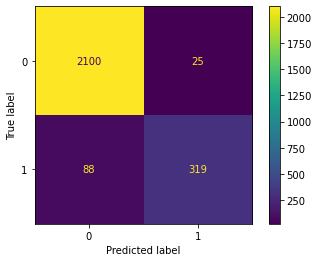

In [175]:
plot_confusion_matrix(rfc, X_test_stand, y_test)

In [176]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50}

In [190]:
rf_accuracy = []
rf_precission=[]
rf_recall = []
rf_f1=[]
rf_auc =[]
rfc = RandomForestClassifier(criterion = 'gini',max_depth = 20,max_features = 'auto',n_estimators = 50, random_state=2)
    
# Fit the model
rfc_model = rfc.fit(X_train_stand, y_train)
# Make Predictions
rfc_pred= rfc_model.predict(X_test_stand)

# Calculate Accuracy, Precision, Recall, and F1 score
rfc_accuracy = accuracy_score(y_test, rfc_pred)
rf_accuracy.append(rfc_accuracy) #append
    
rfc_precision = precision_score(y_test, rfc_pred)
rf_precission.append(rfc_precision)#append
    
rfc_recall = recall_score(y_test, rfc_pred)
rf_recall.append(rfc_recall)#append
    
rfc_f1 = 2 * (rfc_precision * rfc_recall) / (rfc_precision + rfc_recall)
rf_f1.append(rfc_f1)#append
    
# Calculate AUC score
rfc_probs = rfc.predict_proba(X_test_stand)
rfc_probs = rfc_probs[:,1]
rfc_auc = roc_auc_score(y_test, rfc_probs)
rf_auc.append(rfc_auc)
#dataframe de los scores
df_rfc_sin_smote = pd.DataFrame({'Accuracy':rf_accuracy,'Precission':rf_precission,'Recall':rf_recall,'F1_score':rf_f1,'AUC':rf_auc},index=['Standardized'])
df_rfc_sin_smote.T

,Standardized
Accuracy,0.953002
Precission,0.921053
Recall,0.773956
F1_score,0.841121
AUC,0.982729


## Area under the Curve (AUC) plot

In [194]:
r_probs = [0 for _ in range(len(y_test))]

In [197]:
r_auc = roc_auc_score(y_test, r_probs)


In [195]:
#calculando ROC curve
from sklearn.metrics import roc_curve
r_fpr, r_tpr, _ =roc_curve(y_test, r_probs)
lm_fpr,lm_tpr, _ =roc_curve(y_test, lm_probs)
rfc_fpr, rfc_tpr, _ =roc_curve(y_test, rfc_probs)


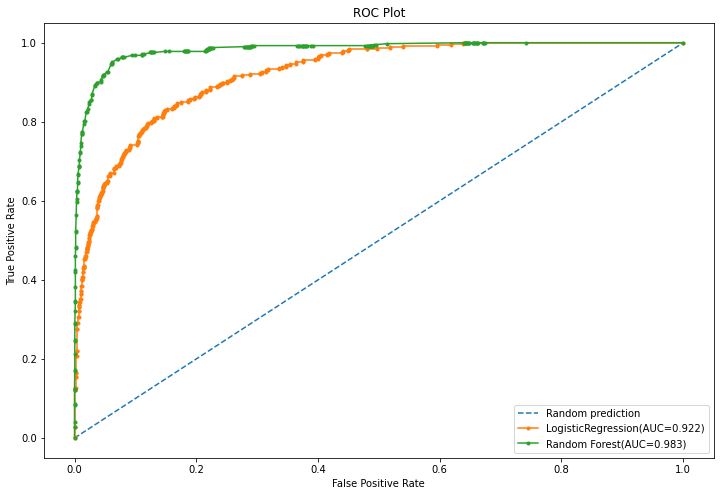

In [200]:
plt.figure(figsize=(12,8))
plt.plot(r_fpr,r_tpr, linestyle = '--', label = 'Random prediction')
plt.plot(lm_fpr, lm_tpr, marker ='.', label='LogisticRegression(AUC=%0.3f)' % lm_auc)
plt.plot(rfc_fpr, rfc_tpr, marker ='.', label='Random Forest(AUC=%0.3f)' % rfc_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusiones

- El comparativo de los 2 modelos (LogisticRegression y RandomForest) muestra una mejor comportamiento en el segundo modelo.
  En las 5 métricas escogidas para el estudio, RandomForest muestra un mejor desempeño. Adicionalmente, el uso de la base de  datos
con datos numéricos estandarizados. Asimismo, el gráfico ROC nos permite visualizar el comportamiento y la inclinación del los modelos. Siendo, RandomForest el modelo con mejor performance.
